In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Step 1: Read the data into Pandas

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2: Visualise data, fill NaN's, encode categoricals to 0 & 1, and drop columns not required

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#fill missing age and fare with mean

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [11]:
 # make male = 0 and female = 1
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1

In [13]:
#turn embarked into numerical classes
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
# Drop unwanted columns from dataset
titanic = titanic.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)

In [23]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


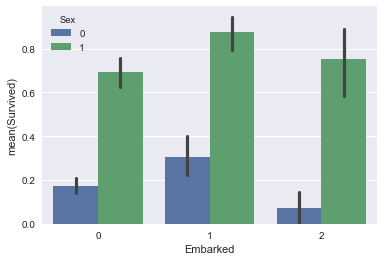

In [24]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic);

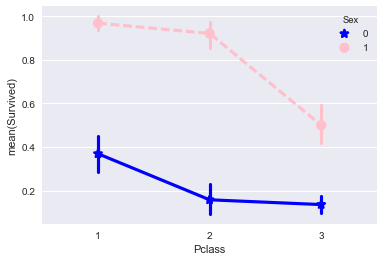

In [26]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titanic,
              palette={0: "blue", 1: "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

## Pearson Correlation Heatmap

let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

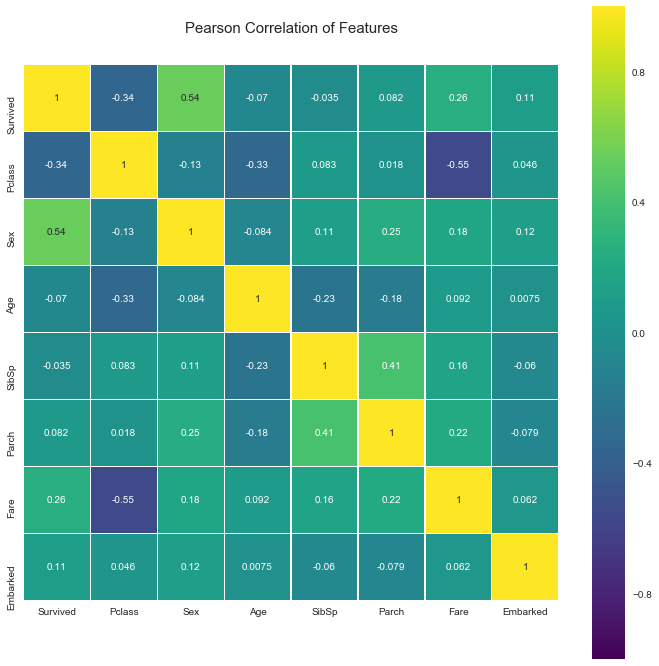

In [27]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Step 3: Create X and y
Define 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' as the features, and Survived as the response.

In [28]:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic[feature_cols]
y = titanic.Survived

# Step 4: Split the data into training and testing sets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Step 5: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

In [34]:
logreg.coef_[0]

array([ -1.23120708e+00,   2.70537903e+00,  -4.60818408e-02,
        -4.04012995e-01,   5.48030350e-02,   4.55932612e-04,
         2.92292500e-01])

# Step 6: Make predictions on the testing set and calculate the accuracy

In [35]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [39]:
# calculate classification accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.811659192825


# Step 7: Compare your testing accuracy to the null accuracy

In [40]:
# this works regardless of the number of classes
y_test.value_counts().head(1) / len(y_test)

0    0.573991
Name: Survived, dtype: float64

In [41]:
# this only works for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.5739910313901345

# Confusion matrix of Titanic predictions

In [45]:
# print confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[110  18]
 [ 24  71]]


In [46]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [47]:
print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

True Positives: 71
True Negatives: 110
False Positives: 18
False Negatives: 24


In [48]:
# calculate the sensitivity
print (TP / float(TP + FN))

0.747368421053


In [49]:
# calculate the specificity
print (TN / float(TN + FP))

0.859375


In [50]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

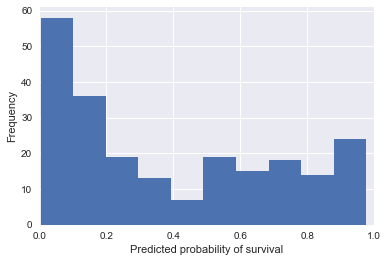

In [51]:
# histogram of predicted probabilities

plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [52]:
# increase sensitivity by lowering the threshold for predicting survival
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [53]:
# old confusion matrix
print (confusion)

[[110  18]
 [ 24  71]]


In [54]:
# new confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[95 33]
 [19 76]]


In [55]:
# new sensitivity (higher than before)
print (76 / float(76 + 19))

0.8


In [57]:
# new specificity (lower than before)
print (95 / float(95 + 33))

0.7421875
